In [92]:
import pandas as pd
from sklearn.model_selection import GridSearchCV,PredefinedSplit,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Invistico_Airline.csv')

Data set taken from google advanced data analytics course


Random Forest uses multiple decision trees to give the result as that classification which has been selected by most of decision trees (mode) or
avg of predicted values of all decision trees in case of regression

Each decision tree in random forest gets a set of features randomly so as to avoid overfitting of data and look at errors in models fitting from different data samples

In addition to decision tree hypermatameter tuning of max_depth and min_samples_leaf we have n_estimators(i.e number of decision trees we want in random forest) and n_samples_split(i.e the sample size without which the split of none into further nodes will not take place) and max_features(the max number of features each decision tree can take)

he min_samples_split parameter will evaluate the number of samples in the node, and if the number is less than the minimum the split will be avoided and the node will be a leaf.

The min_samples_leaf parameter checks before the node is generated, that is, if the possible split results in a child with fewer samples, the split will be avoided (since the minimum number of samples for the child to be a leaf has not been reached) and the node will be replaced by a leaf.

The random forest also used GridSearchCV for hyperparameter tuning

Also we can use seperate validation set instead of using cross validation using PredefindSplit.
Cross Validation can also be used with randomforest

Validation:

Validation is like dividing a dataset in to two different complementary subsets. Then, use one subset for training and another subset for testing. The testing subset is never getting trained over here.

Cross Validation:

It is like dividing a dataset into k number of subsets. In one epoch, use k-1 subsets of data for training and use the remaining dataset for testing. Like this, for every epoch testing dataset will be different, but it will be out of those k subsets of data. This is also called as k-fold cross validation .

# Data Cleaning

In [6]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [8]:
df.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [9]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(0)

In [10]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.045465
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.416353
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
df.describe(include='object')

,satisfaction,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,satisfied,Loyal Customer,Business travel,Business
freq,71087,106100,89693,62160


In [12]:
df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

has encoding of Class and dependent variable satisfaction

In [13]:
df['satisfaction']=df['satisfaction'].map({'satisfied':1,'dissatisfied':0})

In [14]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [15]:
df['Class']=df['Class'].map({'Eco':1,'Eco Plus':2,'Business':3})

In [27]:
df=pd.get_dummies(df,drop_first=True)

In [28]:
X=df.drop(['satisfaction'],axis=1)

In [29]:
Y=df['satisfaction']

In [30]:
df.satisfaction.value_counts(normalize=True)

1    0.547328
0    0.452672
Name: satisfaction, dtype: float64

Hyperparameter tuning using sepearte validation set(we are not using 3 fold cross validation of cv=5,if we want to do cross validation cell 38 and 60 will not be needed)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [38]:
X_val_train,x_val_test,y_val_train,y_val_test=train_test_split(X_train,y_train,test_size=0.25,random_state=0)

In [44]:
para_tuning={'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [59]:
scoring={'accuracy','precision','recall','f1'}

In [60]:
split=[0 if i in X_val_train.index else -1 for i in X_train.index]
cust_split=PredefinedSplit(split)#this helps the model understand which rows to use for testing and which rows to use for training from x_train dataset

In [56]:
clf=RandomForestClassifier()

we are using X_train and Y_train data to train and test the module by dividing them further.X_test and Y_test are the validation dataset.

In [71]:
clf_para_tuning_best_estimate=GridSearchCV(clf,para_tuning,scoring=scoring,cv=cust_split,refit='f1')

In [72]:
%%time 
#magic command that tells how long it takes to run 
clf_para_tuning_best_estimate.fit(X_train,y_train)

CPU times: user 29.8 s, sys: 77.8 ms, total: 29.8 s
Wall time: 29.9 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([0, 0, ..., 0, 0])),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', scoring={'recall', 'precision', 'f1', 'accuracy'})

In [73]:
clf_para_tuning_best_estimate.best_estimator_

RandomForestClassifier(max_depth=50, max_features='sqrt', max_samples=0.9,
                       min_samples_split=0.001)

# Optimizing the model fit using hypertuned parameters having best score

now that we have the optimized parameters we can create the random forest with the same

In [74]:
clf_optimized=RandomForestClassifier(max_depth=50, max_features='sqrt', max_samples=0.9,
                       min_samples_split=0.001)

In [76]:
clf_optimized.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, max_features='sqrt', max_samples=0.9,
                       min_samples_split=0.001)

In [77]:
final_predicted=clf_optimized.predict(X_test)

In [83]:
precision_score(y_test,final_predicted)

0.9535738520696675

In [84]:
recall_score(y_test,final_predicted)

0.9447058823529412

In [85]:
accuracy_score(y_test,final_predicted)

0.9443178318447798

In [87]:
f1_score(y_test,final_predicted)

0.9491191534868014

The random forect has good estimation scores and the model is working well
The most important features affecting customer satisfaction can be found below

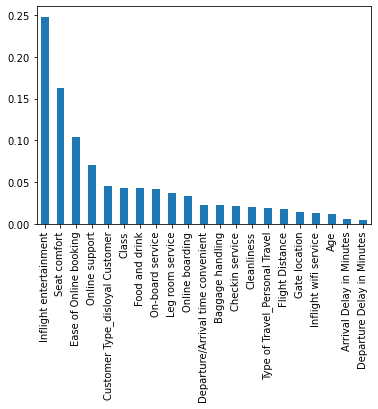

In [93]:
importances = clf_optimized.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);